# Hubbard Dimer @ Half Filling

$$
    H =
    \begin{pmatrix}
         0 &  0 & -t & -t \\
         0 &  0 & +t & +t \\
        -t & +t &  U &  0 \\
        -t & +t &  0 &  U
    \end{pmatrix}
    \begin{align}
        &| \uparrow, \downarrow \rangle \\
        &| \downarrow, \uparrow \rangle \\
        &| \uparrow \downarrow, 0 \rangle \\
        &| 0, \uparrow \downarrow \rangle
    \end{align}
$$

using anti-symmetrized spinor basis functions

$$
    \Psi_1(r_1, r_2) =
    \langle r_2 r_1 | \uparrow, \downarrow \rangle = 
    \frac{1}{\sqrt{2}}
    \left[
    \begin{pmatrix}
        \phi_1(r_1) \\
        \phi_2(r_2)
    \end{pmatrix}
    -
    \begin{pmatrix}
        \phi_1(r_2) \\
        \phi_2(r_1)
    \end{pmatrix}
    \right]
$$
$$
    \Psi_2(r_1, r_2) =
    \langle r_2 r_1 | \downarrow, \uparrow \rangle = 
    \frac{1}{\sqrt{2}}
    \left[
    \begin{pmatrix}
        \phi_2(r_2) \\
        \phi_1(r_1)
    \end{pmatrix}
    -
    \begin{pmatrix}
        \phi_2(r_1) \\
        \phi_1(r_2)
    \end{pmatrix}
    \right]
$$
$$
    \Psi_3(r_1, r_2) =
    \langle r_2 r_1 | \downarrow \uparrow, 0 \rangle = 
    \frac{1}{\sqrt{2}}
    \left[
    \begin{pmatrix}
        \phi_1(r_1) \\
        \phi_1(r_2)
    \end{pmatrix}
    -
    \begin{pmatrix}
        \phi_1(r_2) \\
        \phi_1(r_1)
    \end{pmatrix}
    \right]
$$
$$
    \Psi_4(r_1, r_2) =
    \langle r_2 r_1 | 0, \downarrow \uparrow \rangle = 
    \frac{1}{\sqrt{2}}
    \left[
    \begin{pmatrix}
        \phi_2(r_1) \\
        \phi_2(r_2)
    \end{pmatrix}
    -
    \begin{pmatrix}
        \phi_2(r_2) \\
        \phi_2(r_1)
    \end{pmatrix}
    \right]
$$

-> diagonalizing $H$ results in

$$
    \Psi_\alpha(r_1, r_2) = \sum_i c_i^\alpha \Psi_i(r_1, r_2)
$$

-> charge density

$$
    n_\alpha(r) = \int dr_2 \Psi^*_\alpha(r, r_2) \Psi_\alpha(r, r_2)
$$

<ipython-input-2-75d1373b1599>:100: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x, y, densCov)
<ipython-input-2-75d1373b1599>:107: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x, y, densIon)
<ipython-input-2-75d1373b1599>:114: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest'

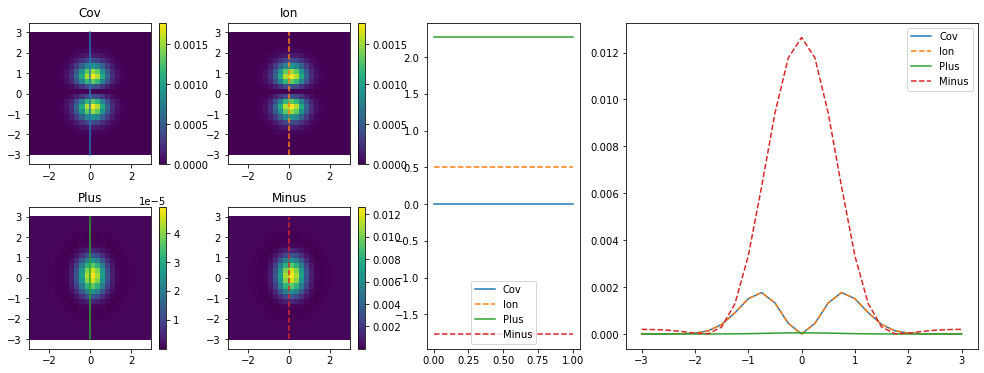

In [2]:
import numpy as np
import matplotlib.pylab as plt
import itertools

def double_Integral(xmin, xmax, ymin, ymax, nx, ny, A):

    dS = ((xmax-xmin)/(nx-1)) * ((ymax-ymin)/(ny-1))

    A_Internal = A[1:-1, 1:-1]

    # sides: up, down, left, right
    (A_u, A_d, A_l, A_r) = (A[0, 1:-1], A[-1, 1:-1], A[1:-1, 0], A[1:-1, -1])

    # corners
    (A_ul, A_ur, A_dl, A_dr) = (A[0, 0], A[0, -1], A[-1, 0], A[-1, -1])

    return dS * (np.sum(A_Internal)\
                + 0.5 * (np.sum(A_u) + np.sum(A_d) + np.sum(A_l) + np.sum(A_r))\
                + 0.25 * (A_ul + A_ur + A_dl + A_dr))

def phi(x,y):
    return np.exp(-(x**2 + y**2))

def dens(psi, xmin, xmax, ymin, ymax, n):
    
    dens = np.zeros((n,n), dtype=np.float)
    
    for x1, y1 in itertools.product(range(n), repeat=2):
        
        dens[x1, y1] = np.abs(double_Integral(xmin, xmax, ymin, ymax, n, n, psi[x1,y1,:,:,0]))**2.0
        dens[x1, y1]+= np.abs(double_Integral(xmin, xmax, ymin, ymax, n, n, psi[x1,y1,:,:,1]))**2.0
        
    return dens / n**4.

xmin = ymin = -3.0
xmax = ymax = +3.0
nx = ny = 25

x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
xGrid, yGrid = np.meshgrid(x, y)

def psi(x, y, n, U, t):
    
    R1 = -0.5
    R2 = +0.5
    
    psi1 = np.zeros((n,n,n,n, 2), dtype=np.float)
    psi2 = np.zeros((n,n,n,n, 2), dtype=np.float)
    psi3 = np.zeros((n,n,n,n, 2), dtype=np.float)
    psi4 = np.zeros((n,n,n,n, 2), dtype=np.float)
    
    for x1, y1, x2, y2 in itertools.product(range(n), repeat=4):
    
        psi1[x1, y1, x2, y2, 0] = phi(x[x1]-R1, y[y1]) - phi(x[x2]-R1, y[y2])
        psi1[x1, y1, x2, y2, 1] = phi(x[x2]-R2, y[y2]) - phi(x[x1]-R2, y[y1])
        
        #psi2[x1, y1, x2, y2, 0] = phi(x[x1]-R2, y[y1]) - phi(x[x2]-R2, y[y2])
        #psi2[x1, y1, x2, y2, 1] = phi(x[x2]-R1, y[y2]) - phi(x[x1]-R1, y[y1])
        
        psi2[x1, y1, x2, y2, 0] = phi(x[x2]-R2, y[y2]) - phi(x[x1]-R2, y[y1])
        psi2[x1, y1, x2, y2, 1] = phi(x[x1]-R1, y[y1]) - phi(x[x2]-R1, y[y2])
        
        psi3[x1, y1, x2, y2, 0] = phi(x[x1]-R1, y[y1]) - phi(x[x2]-R1, y[y2])
        psi3[x1, y1, x2, y2, 1] = phi(x[x2]-R1, y[y2]) - phi(x[x1]-R1, y[y1])
        
        psi4[x1, y1, x2, y2, 0] = phi(x[x1]-R2, y[y1]) - phi(x[x2]-R2, y[y2])
        psi4[x1, y1, x2, y2, 1] = phi(x[x2]-R2, y[y2]) - phi(x[x1]-R2, y[y1])
        
    lp = (U/2. + np.sqrt(U**2. + 16.*t**2.)/2.) / (2.*t)
    lm = (U/2. - np.sqrt(U**2. + 16.*t**2.)/2.) / (2.*t)
        
    psiCov = (psi1 + psi2)/np.sqrt(2.)
    psiIon = (psi3 - psi4)/np.sqrt(2.)
    psiPlu = (psi1 - psi2 - lp * psi3 - lp * psi4)/np.sqrt(2.+(lp**2.)*2.)
    psiMin = (psi1 - psi2 - lm * psi3 - lm * psi4)/np.sqrt(2.+(lm**2.)*2.)
    
    ECov = 0
    EIon = U
    EPlu = lp * (2.*t)
    EMin = lm * (2.*t)
    
    return psiCov, psiIon, psiPlu, psiMin, ECov, EIon, EPlu, EMin

U = 0.5
t = 1.0

psiCov, psiIon, psiPlu, psiMin, ECov, EIon, EPlu, EMin = psi(x, y, nx, U, t)

densCov = dens(psiCov, xmin, xmax, ymin, ymax, nx)
densIon = dens(psiIon, xmin, xmax, ymin, ymax, nx)
densPlu = dens(psiPlu, xmin, xmax, ymin, ymax, nx)
densMin = dens(psiMin, xmin, xmax, ymin, ymax, nx)

plt.figure(1, figsize=(17,6))
grid = plt.GridSpec(nrows=2, ncols=5)

plt.subplot(grid[0,0])
plt.title('Cov')
plt.pcolor(x, y, densCov)
plt.colorbar()
plt.plot([0,0], [-3,+3], color='tab:blue', linestyle='-')
plt.axis('equal')

plt.subplot(grid[0,1])
plt.title('Ion')
plt.pcolor(x, y, densIon)
plt.colorbar()
plt.plot([0,0], [-3,+3], color='tab:orange', linestyle='--')
plt.axis('equal')

plt.subplot(grid[1,0])
plt.title('Plus')
plt.pcolor(x, y, densPlu)
plt.colorbar()
plt.plot([0,0], [-3,+3], color='tab:green', linestyle='-')
plt.axis('equal')

plt.subplot(grid[1,1])
plt.title('Minus')
plt.pcolor(x, y, densMin)
plt.colorbar()
plt.plot([0,0], [-3,+3], color='tab:red', linestyle='--')
plt.axis('equal')

plt.subplot(grid[0:2, 2])
plt.plot([0,1], [ECov, ECov], label='Cov')
plt.plot([0,1], [EIon, EIon], label='Ion', linestyle='--')
plt.plot([0,1], [EPlu, EPlu], label='Plus')
plt.plot([0,1], [EMin, EMin], label='Minus', linestyle='--')
plt.legend()

plt.subplot(grid[0:2, 3:5])
plt.plot(x, densCov[:, int(nx/2)], label='Cov')
plt.plot(x, densIon[:, int(nx/2)], label='Ion', linestyle='--')
plt.plot(x, densPlu[:, int(nx/2)], label='Plus')
plt.plot(x, densMin[:, int(nx/2)], label='Minus', linestyle='--')

plt.legend()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()